### (a) What are the best times and days of the week to minimise delays each year?

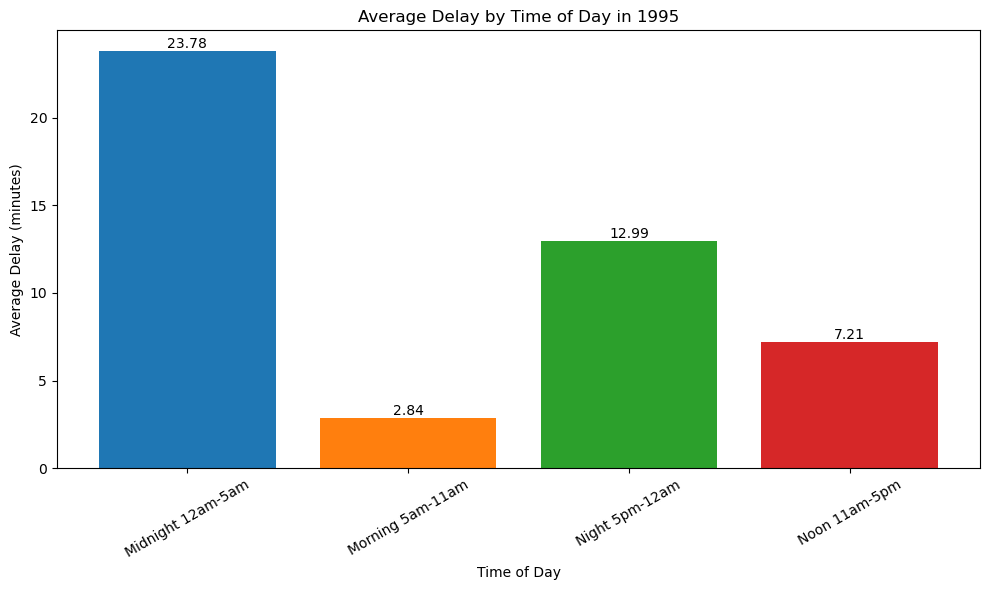

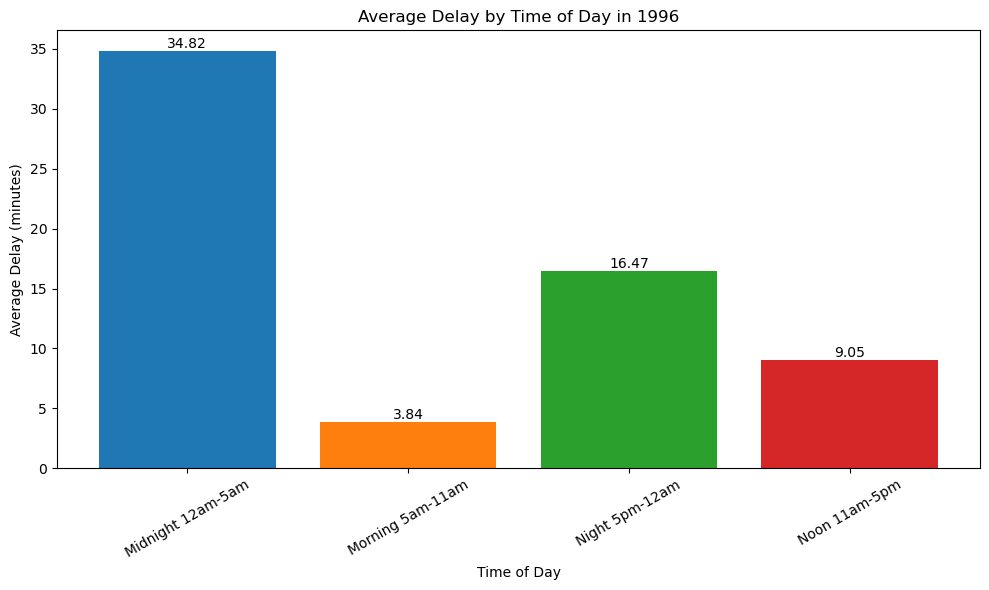

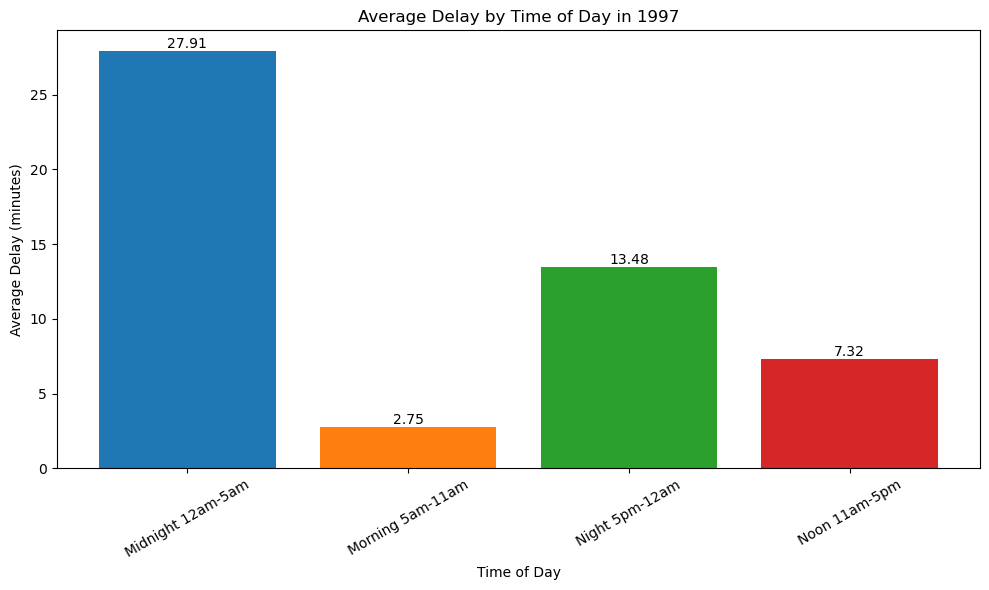

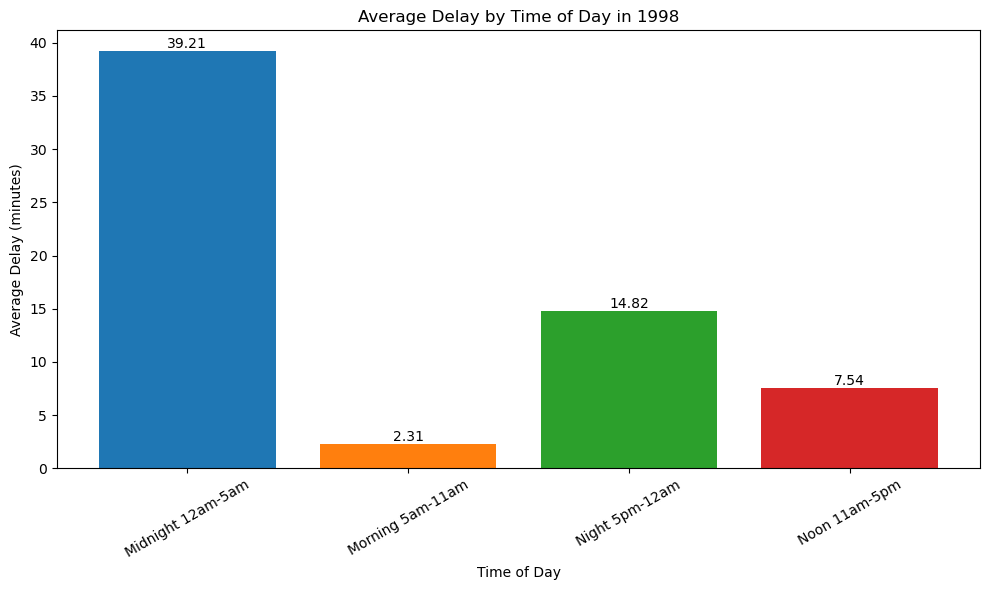

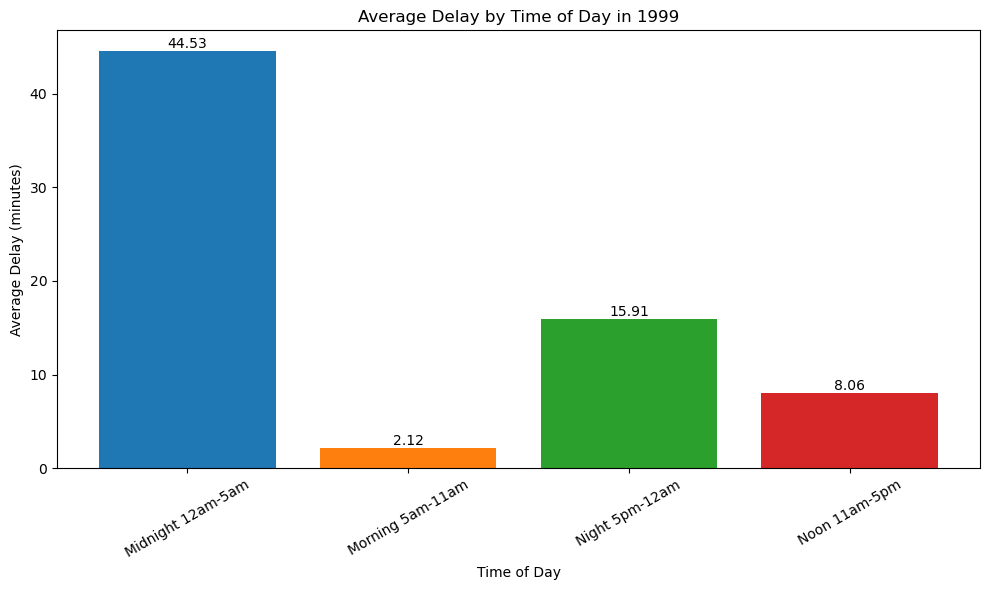

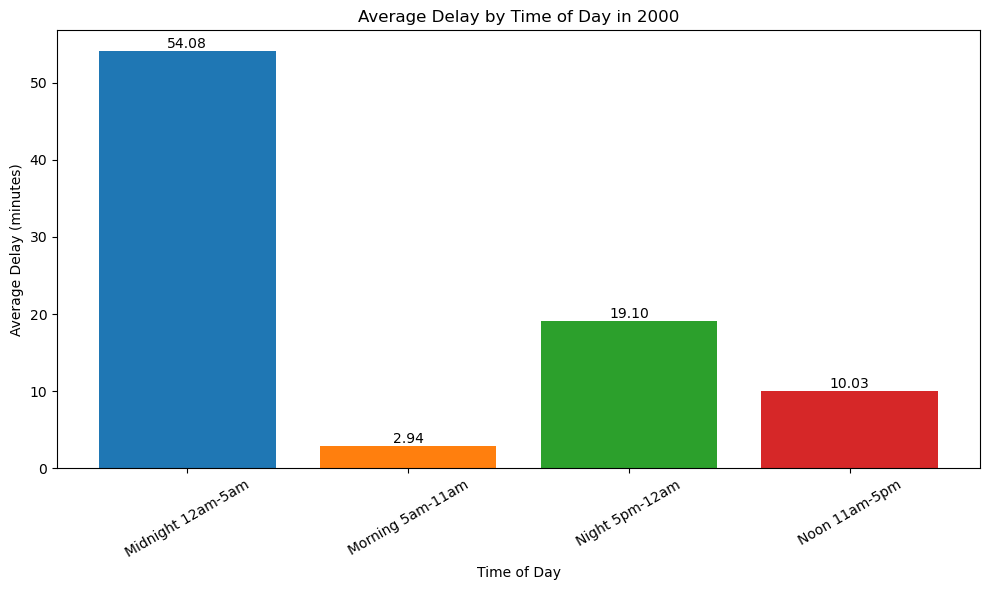

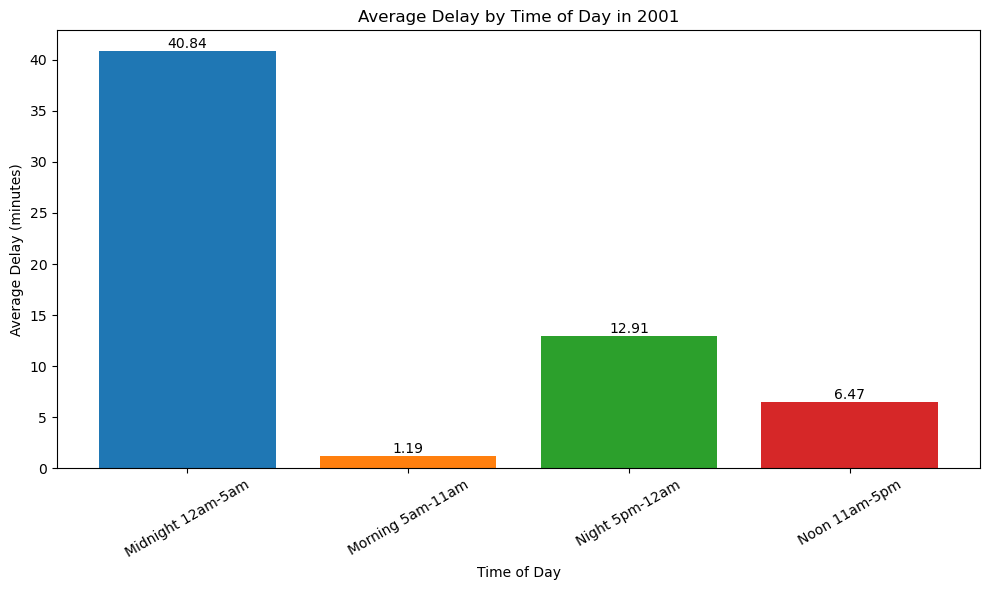

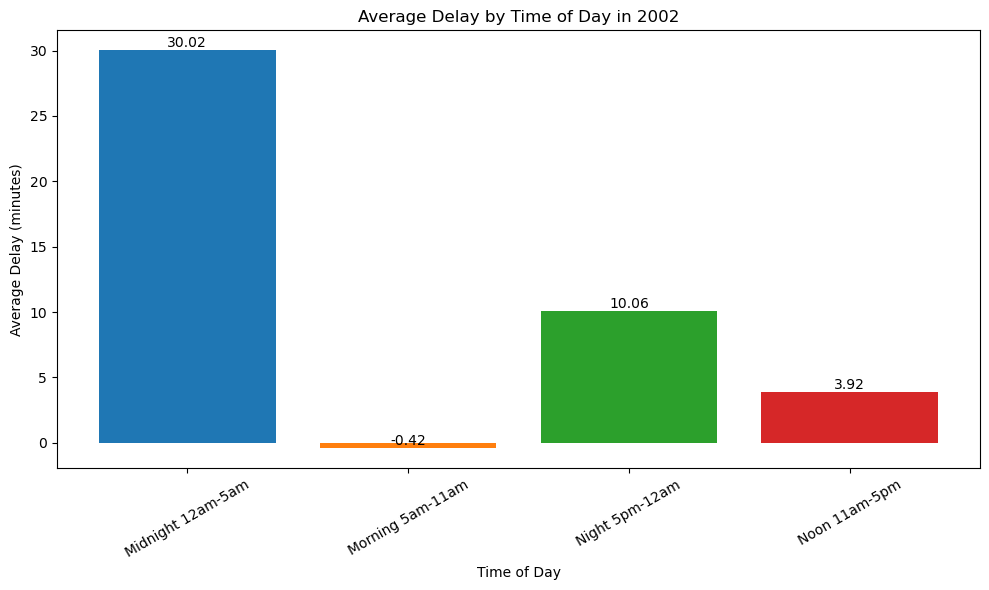

/var/folders/wk/0c1ngk8x1lv4j7pyh9fjdphw0000gn/T/ipykernel_43493/3829548299.py:25: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_data = pd.read_csv(file_name, encoding='latin1')


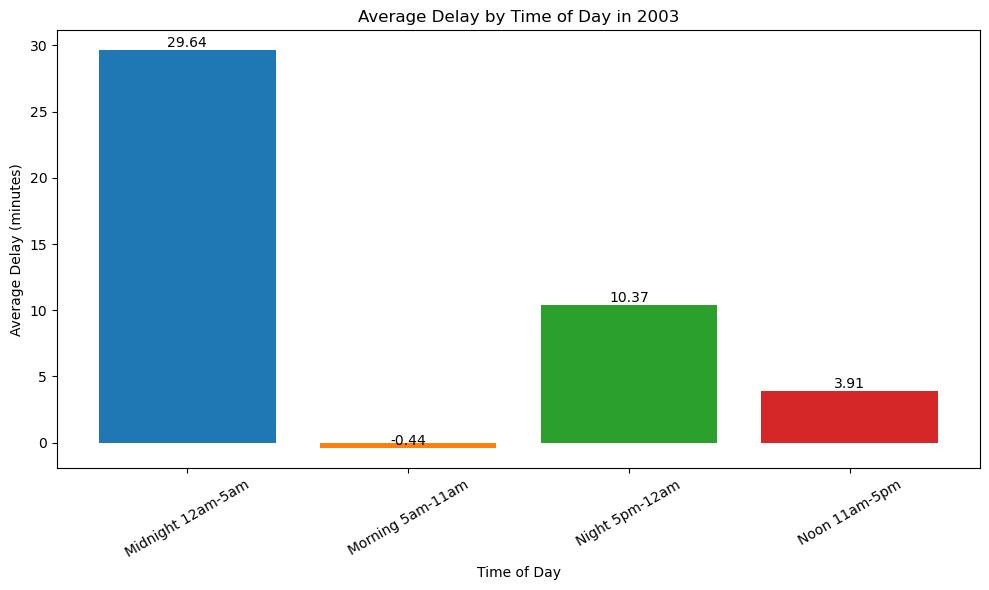

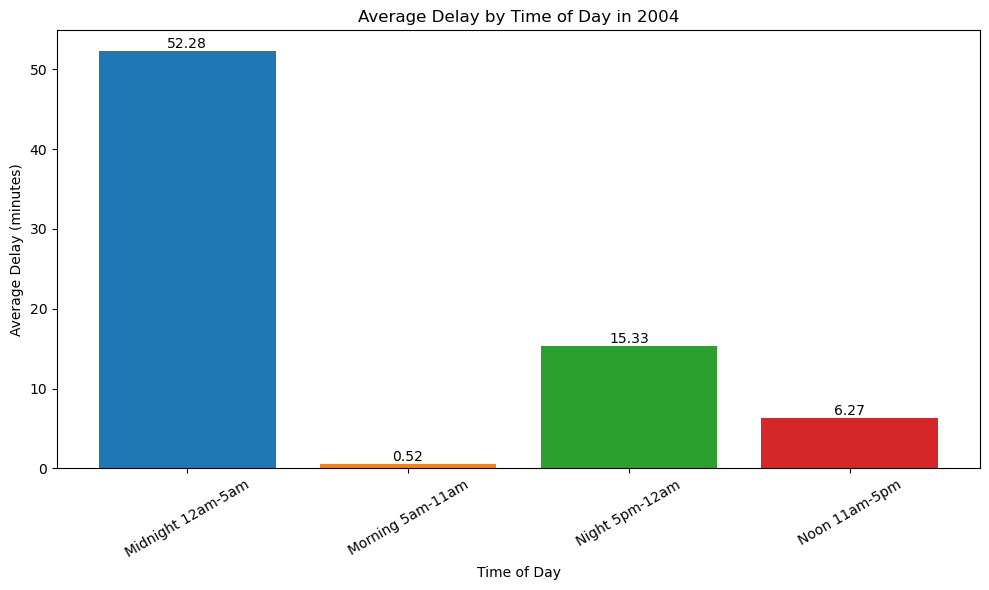

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Define the base path
base_path = '/Users/lorencialo/downloads/COURSEWORK PROG/dataverse_files/'

# Function to categorize departure times into time bins
def categorize_departure_time(departure_hour):
    if 0 <= departure_hour < 5:
        return 'Midnight 12am-5am'
    elif 5 <= departure_hour < 11:
        return 'Morning 5am-11am'
    elif 11 <= departure_hour < 17:
        return 'Noon 11am-5pm'
    else:
        return 'Night 5pm-12am'

# Function to analyze and plot delay by day of week and time of day for a given year
def analyze_delay_by_day_and_time(year):
    file_name = f'{base_path}{year}.csv'
    try:
        # Read CSV file
        flight_data = pd.read_csv(file_name, encoding='latin1')
        
        # Drop rows with missing values
        flight_data.dropna()

        # Convert DepTime to hour
        flight_data['DepHour'] = flight_data['DepTime'] // 100
        
        # Categorize departure times into time bins
        flight_data['TimeBin'] = flight_data['DepHour'].apply(categorize_departure_time)
        
        # Calculate the average delay for each time bin
        flight_data['AvgDelay'] = (flight_data['DepDelay'] + flight_data['ArrDelay']) / 2
        average_delay_by_time = flight_data.groupby('TimeBin')['AvgDelay'].mean().reset_index()
        
        # Plot the graph for average delay by time of day
        plt.figure(figsize=(10, 6))
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Different colors
        bars = plt.bar(average_delay_by_time['TimeBin'], average_delay_by_time['AvgDelay'], color=colors)
        plt.xlabel('Time of Day')
        plt.ylabel('Average Delay (minutes)')
        plt.title(f'Average Delay by Time of Day in {year}')
        plt.xticks(rotation=30)

        # Annotate bars with values
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

        # Find the best time with the lowest average delay
        best_time = average_delay_by_time.loc[average_delay_by_time['AvgDelay'].idxmin()]

        return (year, best_time['TimeBin'], best_time['AvgDelay'])

    except Exception as e:
        print(f"Error reading file for year {year}: {e}")
        return (year, None, None)

# Analyze delay by day of week and time of day for each year from 1995 to 2004
for year in range(1995, 2005):
    analyze_delay_by_day_and_time(year)


In [2]:
import pandas as pd
from IPython.display import HTML, display

# Create the summary data as a DataFrame
summary_df = pd.DataFrame({
    'Year': list(range(1995, 2005)),
    'BestTimeBin': ['Morning 5am-11am'] * 10,
    'LowestAvgDelay': [2.843694, 3.837493, 2.745593, 2.308291, 2.118334, 
                       2.940103, 1.185630, -0.424607, -0.442270, 0.518745]
})


# Set header color
header_color = '#FADADD'

# Generate the table HTML
html_table = summary_df.style\
    .background_gradient(subset=['LowestAvgDelay'], cmap='coolwarm')\
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', header_color)]
    }])\
    .set_caption("Best Time for Lowest Average Delay (1995-2004) in Python")\
    .set_table_attributes('style="margin-left: auto; margin-right: auto;"')\
    .render()

# Render the HTML table
display(HTML(html_table))


/var/folders/wk/0c1ngk8x1lv4j7pyh9fjdphw0000gn/T/ipykernel_43493/4286829120.py:25: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  .render()


,Year,BestTimeBin,LowestAvgDelay
0,1995,Morning 5am-11am,2.843694
1,1996,Morning 5am-11am,3.837493
2,1997,Morning 5am-11am,2.745593
3,1998,Morning 5am-11am,2.308291
4,1999,Morning 5am-11am,2.118334
5,2000,Morning 5am-11am,2.940103
6,2001,Morning 5am-11am,1.185630
7,2002,Morning 5am-11am,-0.424607
8,2003,Morning 5am-11am,-0.442270
9,2004,Morning 5am-11am,0.518745


/var/folders/wk/0c1ngk8x1lv4j7pyh9fjdphw0000gn/T/ipykernel_43493/2783284748.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')  # This colormap has 10 distinct colors


Best Hour for Lowest Average Delay: 5 (Average Delay: -1.24 minutes) in 1995
Best Hour for Lowest Average Delay: 5 (Average Delay: -0.65 minutes) in 1996
Best Hour for Lowest Average Delay: 5 (Average Delay: -0.60 minutes) in 1997
Best Hour for Lowest Average Delay: 5 (Average Delay: -1.85 minutes) in 1998
Best Hour for Lowest Average Delay: 5 (Average Delay: -2.53 minutes) in 1999
Best Hour for Lowest Average Delay: 5 (Average Delay: -2.51 minutes) in 2000
Best Hour for Lowest Average Delay: 5 (Average Delay: -3.50 minutes) in 2001
Best Hour for Lowest Average Delay: 5 (Average Delay: -4.54 minutes) in 2002


/var/folders/wk/0c1ngk8x1lv4j7pyh9fjdphw0000gn/T/ipykernel_43493/2783284748.py:20: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_data = pd.read_csv(file_name, encoding='latin1')


Best Hour for Lowest Average Delay: 5 (Average Delay: -4.68 minutes) in 2003
Best Hour for Lowest Average Delay: 5 (Average Delay: -4.75 minutes) in 2004


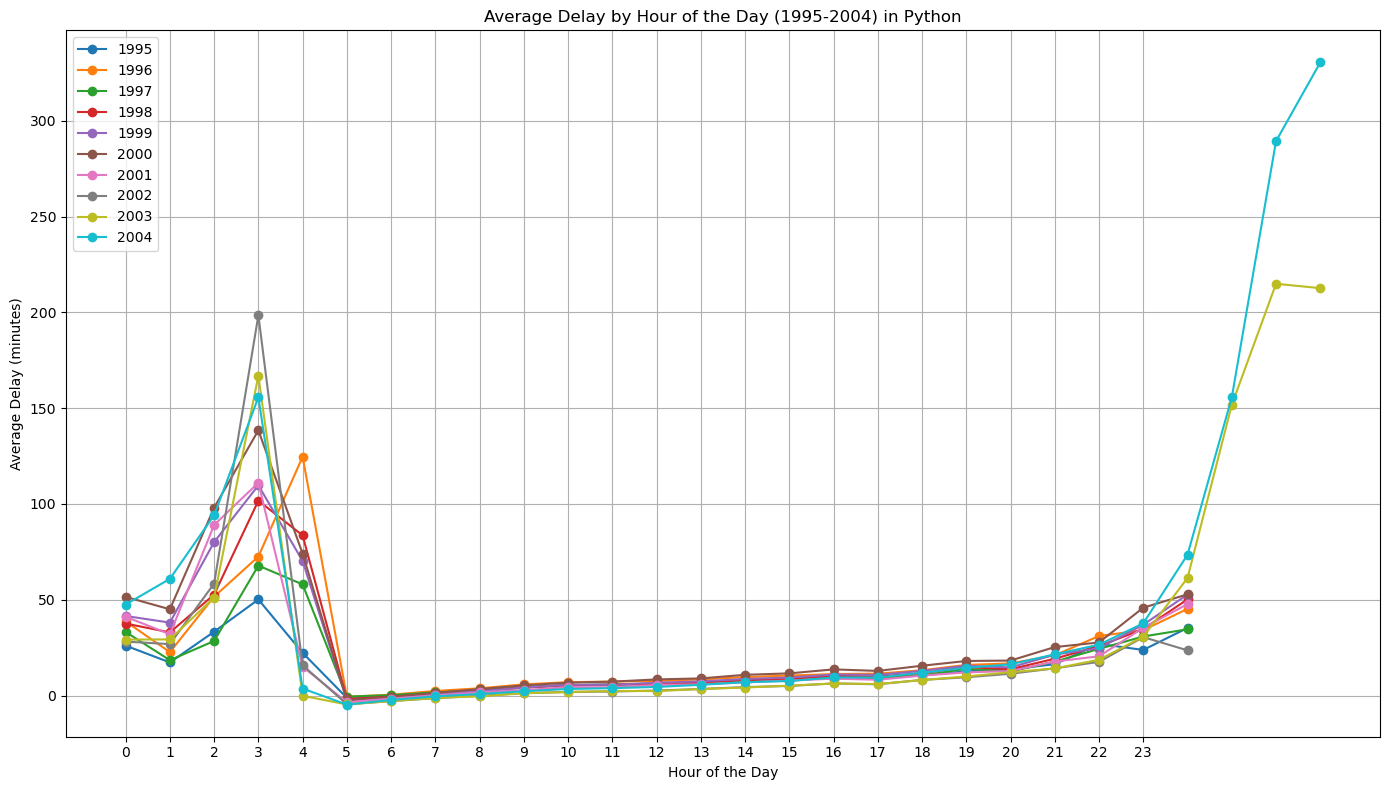

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap

# Define the base path
base_path = '/Users/lorencialo/downloads/COURSEWORK PROG/dataverse_files/'

# Set the colormap
cmap = get_cmap('tab10')  # This colormap has 10 distinct colors

plt.figure(figsize=(14, 8))

# Analyze delay by time of day for each year from 1995 to 2004
for i, year in enumerate(range(1995, 2005)):
    file_name = f'{base_path}{year}.csv'
    try:
        # Read CSV file
        flight_data = pd.read_csv(file_name, encoding='latin1')
        
        # Drop rows with missing values
        flight_data.dropna()
        
        # Convert DepTime to hour
        flight_data['DepHour'] = flight_data['DepTime'] // 100
        
        # Calculate the average delay for each hour
        flight_data['AvgDelay'] = (flight_data['DepDelay'] + flight_data['ArrDelay']) / 2
        average_delay_by_hour = flight_data.groupby('DepHour')['AvgDelay'].mean().reset_index()

        # Plot the line chart for average delay by time of day
        plt.plot(average_delay_by_hour['DepHour'], average_delay_by_hour['AvgDelay'], marker='o', label=f'{year}', color=cmap(i))

        # Find the best time with the lowest average delay
        best_hour = average_delay_by_hour.loc[average_delay_by_hour['AvgDelay'].idxmin()]
        print(f"Best Hour for Lowest Average Delay: {int(best_hour['DepHour'])} (Average Delay: {best_hour['AvgDelay']:.2f} minutes) in {year}")

    except Exception as e:
        print(f"Error reading file for year {year}: {e}")

plt.xlabel('Hour of the Day')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay by Hour of the Day (1995-2004) in Python')
plt.grid(True)
plt.xticks(range(0, 24))  # Set x-ticks to show all hours of the day
plt.legend()
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
from IPython.display import HTML, display

# Create the summary data as a DataFrame
summary_df = pd.DataFrame({
    'Year': list(range(1995, 2005)),
    'Best_Hour': [5] * 10,
    'Lowest_AvgDelay': [-1.24394, -0.6476258, -0.6020771, -1.848017, -2.533068, 
                        -2.50563, -3.495227, -4.541041, -4.67673, -4.747682]
})

# Define row colors
row_colors = [
    '#FFCCCC', '#CCCCFF', '#CCFFCC', '#FFFF99', '#FFCC99',
    '#99CCFF', '#CC99FF', '#FF99CC', '#CCCC99', '#99FFCC'
]

# Set header color
header_color = '#FADADD'

# Custom function to apply background color to each row
def apply_row_colors(row):
    return [f"background-color: {row_colors[row.name]}"] * len(row)

# Apply the colors to each row
styled_html = summary_df.style.apply(apply_row_colors, axis=1)

# Make the Lowest_AvgDelay column bold and with white text
styled_html = styled_html.set_table_styles([
    {'selector': 'th', 'props': [('background-color', header_color)]},
    {'selector': 'td:nth-child(3)', 'props': [('font-weight', 'bold'), ('color', 'black')]}
])

# Render the styled HTML table
display(HTML(styled_html.render()))



/var/folders/wk/0c1ngk8x1lv4j7pyh9fjdphw0000gn/T/ipykernel_43493/1234596405.py:35: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  display(HTML(styled_html.render()))


,Year,Best_Hour,Lowest_AvgDelay
0,1995,5,-1.243940
1,1996,5,-0.647626
2,1997,5,-0.602077
3,1998,5,-1.848017
4,1999,5,-2.533068
5,2000,5,-2.505630
6,2001,5,-3.495227
7,2002,5,-4.541041
8,2003,5,-4.676730
9,2004,5,-4.747682


Table: Average Delay by Day of the Week in 1995
   DayOfWeek  AvgDelay
0     Monday  6.512384
1    Tuesday  6.834325
2  Wednesday  8.354173
3   Thursday  8.761952
4     Friday  9.257397
5   Saturday  6.561295
6     Sunday  6.978739


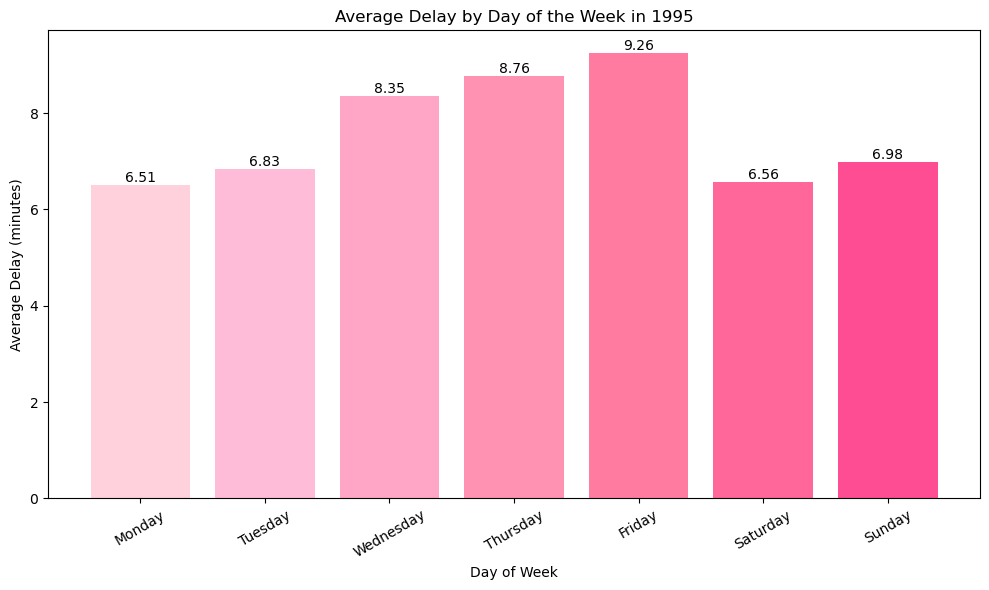

Best Day for Lowest Average Delay: Monday (Average Delay: 6.51 minutes)
Table: Average Delay by Day of the Week in 1996
   DayOfWeek   AvgDelay
0     Monday   9.199249
1    Tuesday   8.980114
2  Wednesday   9.556985
3   Thursday  11.327319
4     Friday  12.766712
5   Saturday   7.859997
6     Sunday   8.732287


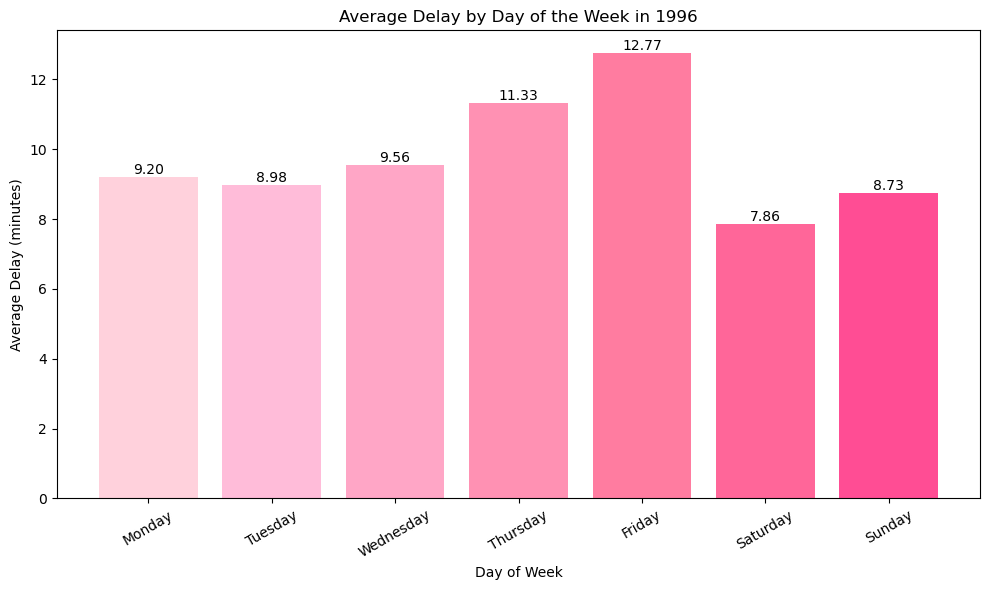

Best Day for Lowest Average Delay: Saturday (Average Delay: 7.86 minutes)
Table: Average Delay by Day of the Week in 1997
   DayOfWeek   AvgDelay
0     Monday   6.460569
1    Tuesday   5.868216
2  Wednesday   7.882440
3   Thursday   9.242781
4     Friday  10.729264
5   Saturday   6.524139
6     Sunday   8.067765


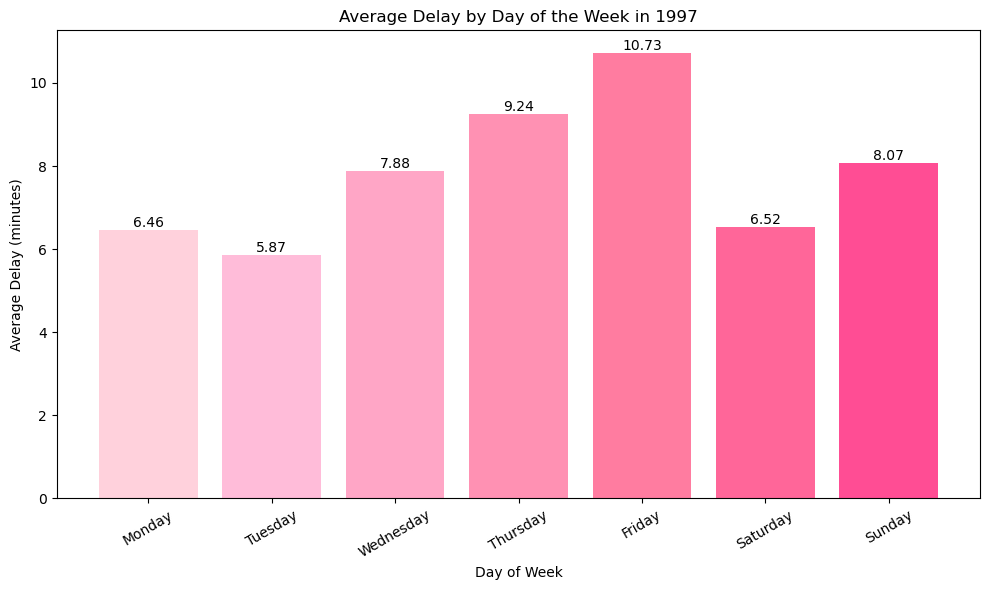

Best Day for Lowest Average Delay: Tuesday (Average Delay: 5.87 minutes)
Table: Average Delay by Day of the Week in 1998
   DayOfWeek   AvgDelay
0     Monday   7.954521
1    Tuesday   7.833866
2  Wednesday   7.921145
3   Thursday   9.830863
4     Friday  10.593026
5   Saturday   5.349508
6     Sunday   8.101215


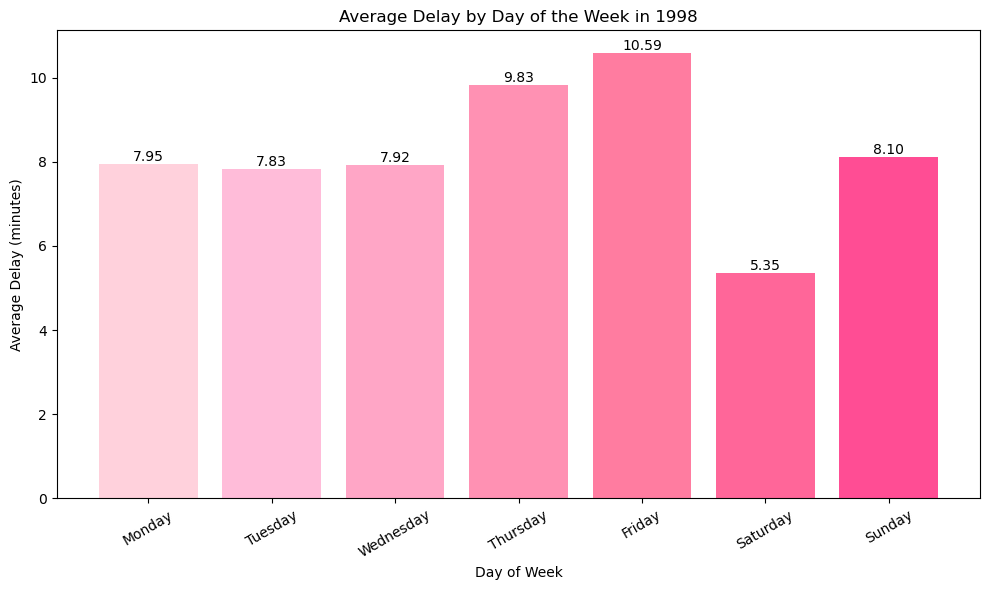

Best Day for Lowest Average Delay: Saturday (Average Delay: 5.35 minutes)
Table: Average Delay by Day of the Week in 1999
   DayOfWeek   AvgDelay
0     Monday   8.541770
1    Tuesday   6.990512
2  Wednesday   8.173167
3   Thursday  10.073154
4     Friday  11.611426
5   Saturday   6.780820
6     Sunday   8.895158


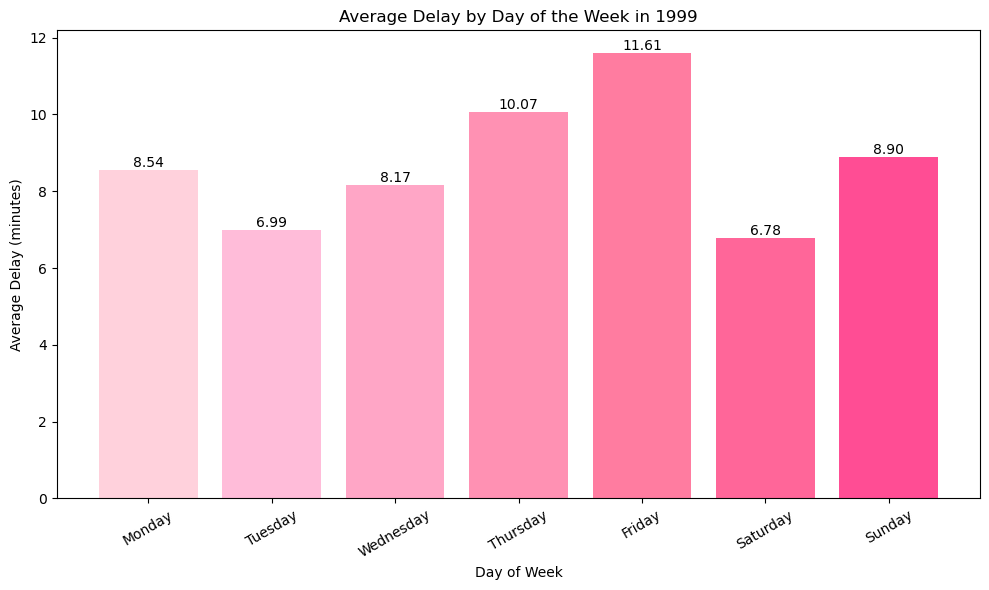

Best Day for Lowest Average Delay: Saturday (Average Delay: 6.78 minutes)
Table: Average Delay by Day of the Week in 2000
   DayOfWeek   AvgDelay
0     Monday   9.691675
1    Tuesday   7.927248
2  Wednesday   9.636323
3   Thursday  13.177480
4     Friday  15.407205
5   Saturday   7.883807
6     Sunday  11.857730


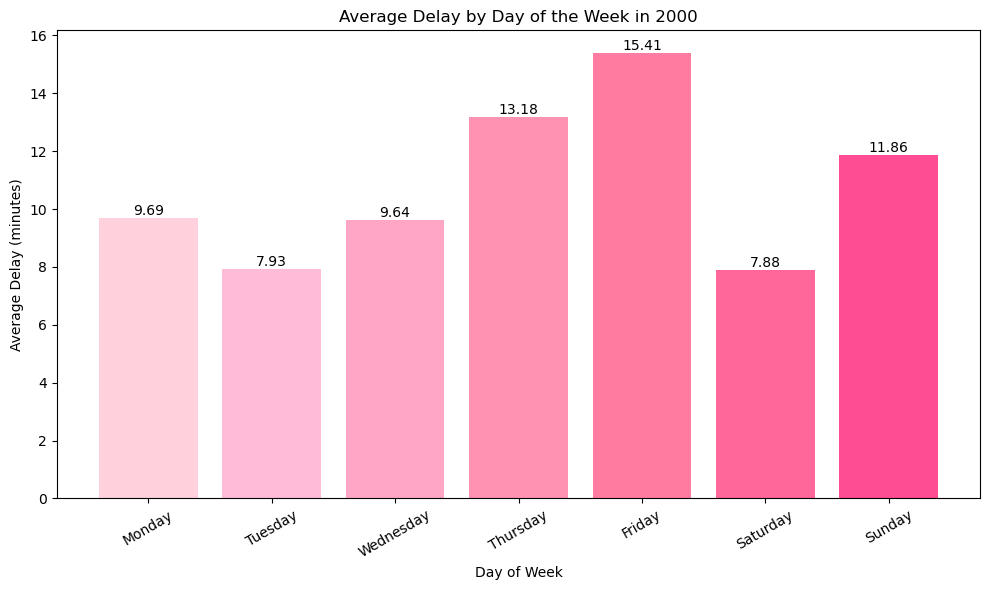

Best Day for Lowest Average Delay: Saturday (Average Delay: 7.88 minutes)
Table: Average Delay by Day of the Week in 2001
   DayOfWeek   AvgDelay
0     Monday   5.738393
1    Tuesday   4.779724
2  Wednesday   5.777924
3   Thursday   8.398915
4     Friday  10.084637
5   Saturday   5.722049
6     Sunday   7.142076


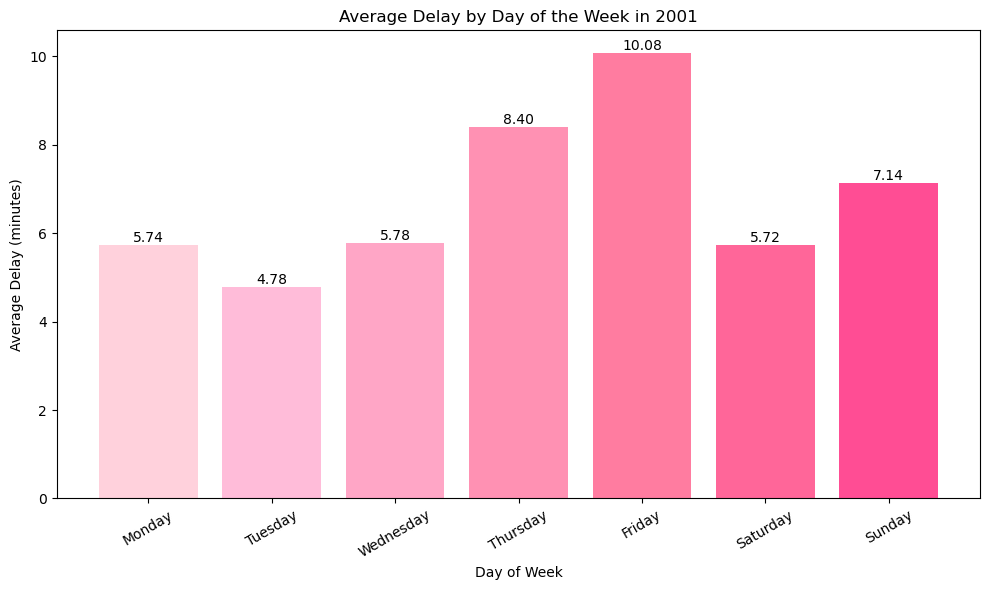

Best Day for Lowest Average Delay: Tuesday (Average Delay: 4.78 minutes)
Table: Average Delay by Day of the Week in 2002
   DayOfWeek  AvgDelay
0     Monday  4.626209
1    Tuesday  3.505959
2  Wednesday  3.599451
3   Thursday  5.684563
4     Friday  6.333538
5   Saturday  2.107944
6     Sunday  4.287436


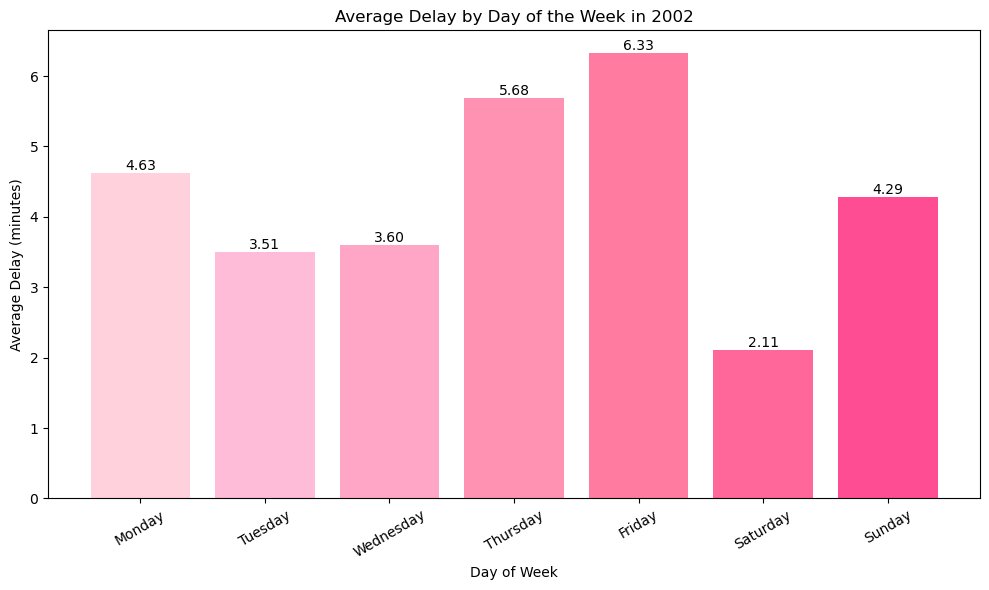

Best Day for Lowest Average Delay: Saturday (Average Delay: 2.11 minutes)


/var/folders/wk/0c1ngk8x1lv4j7pyh9fjdphw0000gn/T/ipykernel_43493/793874444.py:12: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_data = pd.read_csv(base_path + file_name, encoding='latin1')


Table: Average Delay by Day of the Week in 2003
   DayOfWeek  AvgDelay
0     Monday  4.737389
1    Tuesday  3.274092
2  Wednesday  3.825908
3   Thursday  5.530908
4     Friday  6.016621
5   Saturday  2.171316
6     Sunday  5.017159


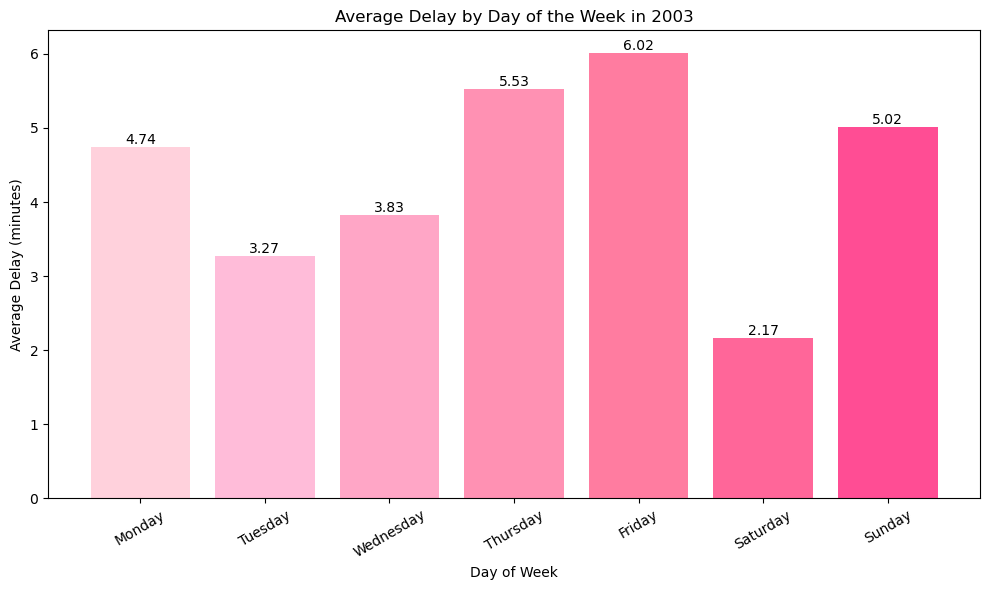

Best Day for Lowest Average Delay: Saturday (Average Delay: 2.17 minutes)
Table: Average Delay by Day of the Week in 2004
   DayOfWeek  AvgDelay
0     Monday  8.377502
1    Tuesday  6.038900
2  Wednesday  7.117038
3   Thursday  8.349893
4     Friday  8.461947
5   Saturday  4.215136
6     Sunday  7.286647


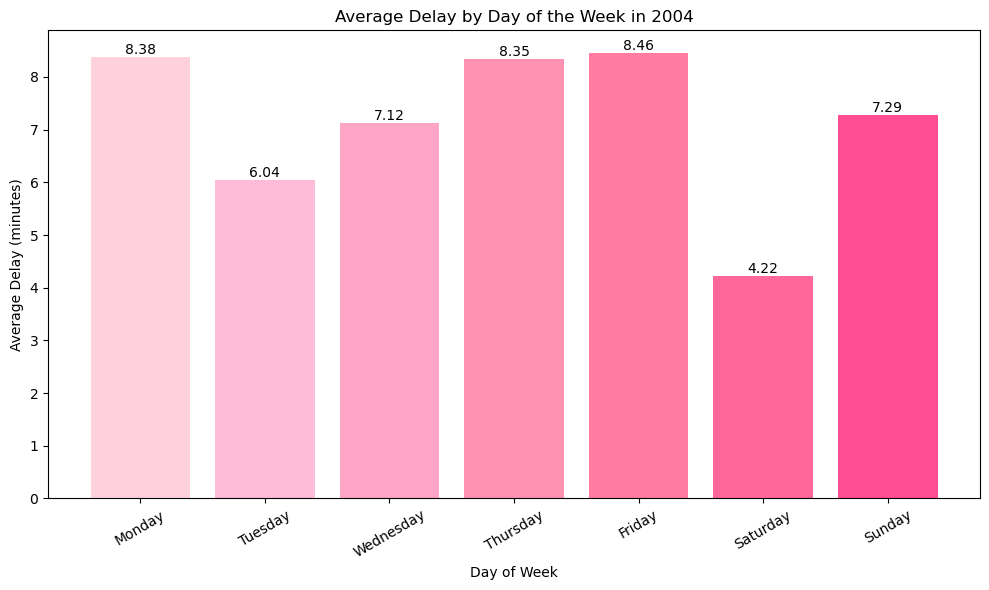

Best Day for Lowest Average Delay: Saturday (Average Delay: 4.22 minutes)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the base path
base_path = '/Users/lorencialo/downloads/COURSEWORK PROG/dataverse_files/'

# Function to analyze and plot delay by day of week and time of day for a given year
def analyze_delay_by_day_and_time(year):
    file_name = f'{year}.csv'
    try:
        # Read CSV file
        flight_data = pd.read_csv(base_path + file_name, encoding='latin1')
    except Exception as e:
        print(f"Error reading file for year {year}: {e}")
        return
    
    # Drop rows with missing values
    flight_data.dropna()
    
    # Calculate the average delay for each day of the week
    flight_data['AvgDelay'] = (flight_data['DepDelay'] + flight_data['ArrDelay']) / 2
    average_delay_by_day = flight_data.groupby('DayOfWeek')['AvgDelay'].mean().reset_index()
    average_delay_by_day['DayOfWeek'] = average_delay_by_day['DayOfWeek'].map({
        1: 'Monday',
        2: 'Tuesday',
        3: 'Wednesday',
        4: 'Thursday',
        5: 'Friday',
        6: 'Saturday',
        7: 'Sunday'
    })

    # Sort the data by day of the week
    average_delay_by_day_sorted = average_delay_by_day.sort_values(by='DayOfWeek', key=lambda x: pd.Categorical(x, categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True))

    # Print the table
    print(f"Table: Average Delay by Day of the Week in {year}")
    print(average_delay_by_day_sorted)
    
    # Define pastel colors
    pastel_colors = ['#FFD1DC', '#FFBCD9', '#FFA6C6', '#FF91B3', '#FF7CA0', '#FF6699', '#FF4D94']
    num_days = len(average_delay_by_day_sorted['AvgDelay'])
    colors = pastel_colors[:num_days]

    # Plot the graph for average delay by day of the week
    plt.figure(figsize=(10, 6))
    bars = plt.bar(average_delay_by_day_sorted['DayOfWeek'], average_delay_by_day_sorted['AvgDelay'], color=colors)
    plt.xlabel('Day of Week')
    plt.ylabel('Average Delay (minutes)')
    plt.title(f'Average Delay by Day of the Week in {year}')
    plt.xticks(rotation=30)
    
    # Annotate bars with values
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Find the best day with the lowest average delay
    best_day = average_delay_by_day_sorted.loc[average_delay_by_day_sorted['AvgDelay'].idxmin()]
    print(f"Best Day for Lowest Average Delay: {best_day['DayOfWeek']} (Average Delay: {best_day['AvgDelay']:.2f} minutes)")

# Analyze delay by day of week for each year from 1995 to 2004
for year in range(1995, 2005):
    analyze_delay_by_day_and_time(year)

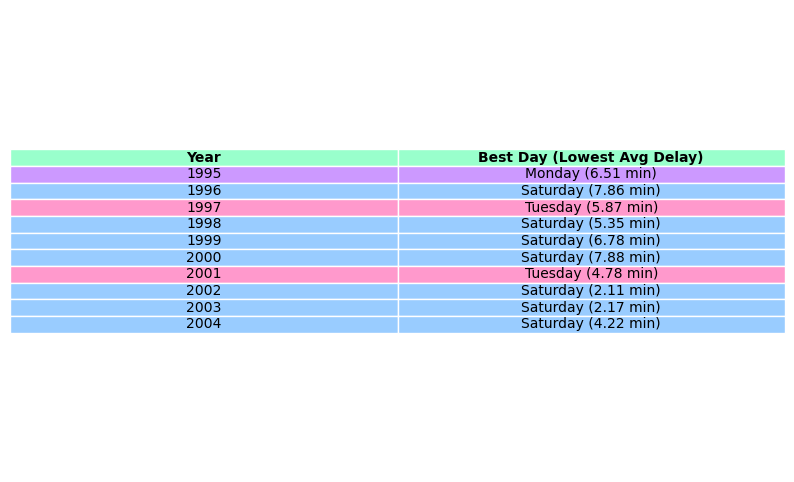

In [7]:
data = {
    'Year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004],
    'Best Day': ['Monday', 'Saturday', 'Tuesday', 'Saturday', 'Saturday', 'Saturday', 'Tuesday', 'Saturday', 'Saturday', 'Saturday'],
    'Lowest Avg Delay': [6.51, 7.86, 5.87, 5.35, 6.78, 7.88, 4.78, 2.11, 2.17, 4.22]  # Example values
}

df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')

# Generating the table data
table_data = [[year, f"{day} ({value:.2f} min)"] for year, day, value in zip(df['Year'], df['Best Day'], df['Lowest Avg Delay'])]

# Adding a header
table_data.insert(0, ["Year", "Best Day (Lowest Avg Delay)"])

# Creating the table
table = ax.table(cellText=table_data, colLabels=table_data.pop(0), loc='center', cellLoc='center')

# Header color
header_color = '#99FFCC'  # Pastel pink

# Apply pastel pink color to header
for j in range(len(table_data[0])):
    table[(0, j)].set_facecolor(header_color)
    table[(0, j)].set_edgecolor('white')
    table[(0, j)].set_text_props(weight='bold')

# Coloring rows based on the year with a sequence of colors
colors = ['#CC99FF','#99CCFF','#FF99CC','#99CCFF','#99CCFF', '#99CCFF', '#FF99CC','#99CCFF','#99CCFF','#99CCFF']

# Apply colors to each cell based on its row, starting from row 1 (skip header)
for i, color in enumerate(colors, start=1):  # Starting index at 1 to skip header
    for j, _ in enumerate(table_data[0]):  # Iterate through columns
        table[(i, j)].set_facecolor(color)
        table[(i, j)].set_edgecolor('white')